# Lecture 4: Summary statistics

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Introduction

Summary statistics (popisné charakteristiky / štatistiky) are quantities that summarize basic properties of a single variable (a table column), such as the mean. Some of them also characterize dependencies between pairs of variables. Together with simple plots, such as histograms, they give us the first glimpse at the data when working with a new data set.



## Importing the movie data set

We start this lecture by loading the movie data set, which we use to illustrate these terms. This is the same data set as in group tasks 04. It describes 2049 movies and was downloaded from https://www.kaggle.com/rounakbanik/the-movies-dataset and preprocessed, keeping only movies with at least 500 viewer votes.

In [33]:
# We import usual libraries
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://bbrejova.github.io/viz/data/Movies_small.csv'
movies = pd.read_csv(url)
display(movies.head())

,title,year,budget,revenue,original_language,runtime,release_date,vote_average,vote_count,overview
0,Toy Story,1995,30000000.0,373554033.0,en,81.0,1995-10-30,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,65000000.0,262797249.0,en,104.0,1995-12-15,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,Heat,1995,60000000.0,187436818.0,en,170.0,1995-12-15,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
3,GoldenEye,1995,58000000.0,352194034.0,en,130.0,1995-11-16,6.6,1194.0,James Bond must unmask the mysterious head of ...
4,Casino,1995,52000000.0,116112375.0,en,178.0,1995-11-22,7.8,1343.0,The life of the gambling paradise – Las Vegas ...


## Measures of central tendency (miery stredu / polohy)

Measures of central tendency represent a typical value in a sample $x$ with values $x_1,\dots, x_n$ (one numerical column of a table).

* **Mean (priemer)** $\bar{x}=\frac{\sum_{i=1}^n x_i}{n}$
  * This is the arithmetic mean, there are also geometric and harmonic means.
* **Median (medián)** is the middle value when the values ordered from the smallest to largest.
  * For even $n$ usually defined as the average of the two middle values.
  * Median of 10, 12, 15, 16, 16 is 15.
  * Median of 10, 12, 15, 16, 16, 20 is 15.5.
* **Mode (modus)** is the most frequent value (for a discrete variable).
  * Mode of 10,12,15,16,16 is 16.
  * For continuous variables, we may look for a mode in a histogram (this is sensitive to bin size).

### Mean vs. median

The mean can be heavily influenced by outliers. In the examples below we have 6 values in 800-2000 range and one very high outlier value. This outlier has a large influence of the mean, but the median stays the same. Therefore we often prefer median (e.g. we report median salary rather than mean salary).

* Mean of 800, 1000, 1100, 1200, 1800, 2000 and 30000 is 5414.3, median 1200.
* Mean of 800, 1000, 1100, 1200, 1800, 2000 and 10000 is 2557.1, median 1200.

### Computation in Pandas

Below we apply functions [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), [`median`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html), and [`mode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) to a Series. We will use column `year` of our table, which specifies when the movie was released.

Note that `mode` returns a Series of results (for case of ties). Here we get just a single value 2013.

Note the use of [Python f-strings](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) to print the results.

In [3]:
display(Markdown("**Properties of the column `year` in our table:**"))
print(f"Mean: {movies['year'].mean():.2f}")
print(f"Median: {movies['year'].median()}")
print(f"Mode:\n{movies['year'].mode()}")

**Properties of the column `year` in our table:**

Mean: 2004.14
Median: 2008.0
Mode:
0    2013
Name: year, dtype: int64


Let us display these values in a histogram of the column values (overall view and detail).

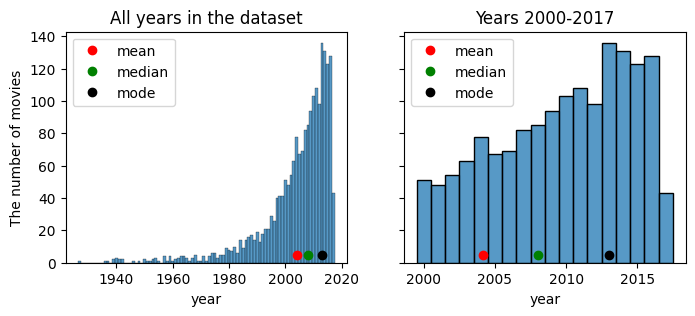

In [4]:
# set up figure with two plots
figure, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)

# plot histograms, use discrete=True to have each year in one bin
sns.histplot(data=movies, x='year', discrete=True, ax=axes[0])
sns.histplot(x=movies.query('year>=2000')['year'], discrete=True, ax=axes[1])

# titles and axis labels
axes[0].set_ylabel("The number of movies")
axes[0].set_title('All years in the dataset')
axes[1].set_title('Years 2000-2017')

# compute three summary statics, set up their color and label
stats = [{'label':'mean', 'value':movies['year'].mean(), 'color':'red'},
         {'label':'median', 'value':movies['year'].median(), 'color':'green'},
         {'label':'mode', 'value':movies['year'].mode(), 'color':'black'}]

# add a dot for each statistics to both plots (at y=5)
for a in axes:
  for s in stats:
    a.plot(s['value'], 5, 'o', color=s['color'], label=s['label'])
  a.legend()

pass

* As shown below, functions `mean` and `median` can be applied to all numerical columns in a table.
* With `axis=1` we can compute means or medians in rows (but this would not be useful in our table).

In [32]:
# Setting for displaying 1 decimal number in Pandas tables
old_format = pd.options.display.float_format
pd.options.display.float_format = '{:,.1f}'.format
all_means = movies.mean(numeric_only=True)
display(Markdown("**`movies.mean(numeric_only=True)`:**"), all_means)
all_medians = movies.median(numeric_only=True)
display(Markdown("**`movies.median(numeric_only=True)`:**"), all_medians)
# restore default format
pd.options.display.float_format = old_format

**`movies.mean(numeric_only=True)`:**

year                 2,004.1
budget          55,108,939.7
revenue        198,565,134.3
runtime                112.7
vote_average             6.6
vote_count           1,704.6
dtype: float64

**`movies.median(numeric_only=True)`:**

year                 2,008.0
budget          38,000,000.0
revenue        122,200,000.0
runtime                109.0
vote_average             6.6
vote_count           1,092.0
dtype: float64

## Quantiles, percentiles and quartiles (kvantily, percentily, kvartily)

Recall that median is the middle value in a sorted order. Therefore about 50% of values are smaller and 50% larger. For a different percentage $p$, the $p$-th **percentile** is at position roughly $(p/100)\cdot n$ in the sorted order of values. **Quantile** (in [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)) is defined similarly, but we give a fraction between 0 and 1 rather than  a percentage.

Specifically **quartiles** are three values $Q_1$, $Q_2$ and $Q_3$ that split input data into quarters. Therefore, $Q_2$ is the median. 

Many definitions exist regarding situations when the desired fraction falls between two values (we can take the lower of the two, the higher, their mean, weighted mean etc). We will discuss this in more detail below.



### Computation in Pandas

Function [`quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) gets a single value between 0 and 1 or a list of values and returns the corresponding quantiles. 


In the example below, to get quantiles for 0.1, 0.2, ..., 0.9, we generate a regular sequence of values using [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [6]:
display(Markdown("**Median:**"), movies['year'].median())
display(Markdown("**Quantile for 0.5:**"), movies['year'].quantile(0.5))
display(Markdown("**All quartiles:**"), movies['year'].quantile([0.25, 0.5, 0.75]))
display(Markdown("**With step 0.1:**"), movies['year'].quantile(np.arange(0.1, 1, 0.1)))

**Median:**

np.float64(2008.0)

**Quantile for 0.5:**

np.float64(2008.0)

**All quartiles:**

0.25    2000.0
0.50    2008.0
0.75    2013.0
Name: year, dtype: float64

**With step 0.1:**

0.1    1988.8
0.2    1998.0
0.3    2002.0
0.4    2005.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2014.0
0.9    2015.0
Name: year, dtype: float64

The code below plots the quartiles highlighted in a histogram.

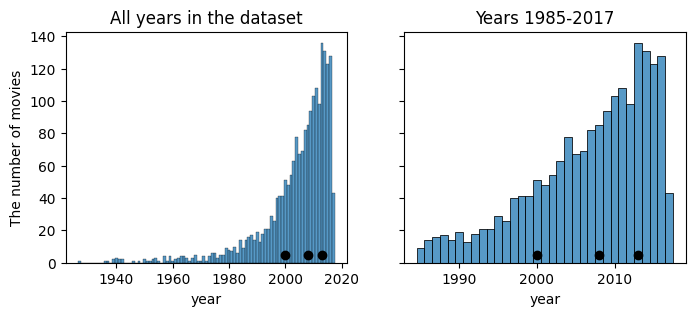

In [7]:
# setup histograms
figure, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)
sns.histplot(data=movies, x='year', discrete=True, ax=axes[0])
sns.histplot(x=movies.query('year>=1985')['year'], discrete=True, ax=axes[1])
axes[0].set_ylabel("The number of movies")
axes[0].set_title('All years in the dataset')
axes[1].set_title('Years 1985-2017')

# compute and display quartiles
quartiles = movies['year'].quantile([0.25, 0.5, 0.75])
for a in axes:
    a.plot(quartiles, [5] * len(quartiles), 'o', color='black')                 
pass

### Interpolation in quantile computation

The code below illustrates how the [`quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) function works when returning quantiles which do not correspond to a single input value. Its optional parameter `interpolation` accepts values `‘linear’` (default), `‘lower’`, `‘higher’`, `‘midpoint’`, or `‘nearest’`. Imagine the lowest element at quantile 0, the highest element at quantile 1 and the rest evenly spaced between. The quantile at position between two elements is always influenced only by its two neighbors.

For example, consider the list of values [10,30,30,40]. 

* Values taken from the list: $p=0$: 10,  $p=1/3$: 30,  $p=2/3$: 30,  $p=1$: 40
* For $p=1/4$ **linear interpolation** returns the value at 3/4 between 10 and 30, i.e. 25.

Note that linear interpolation is continuous as $p$ changes from 0 to 1.


In [8]:
a = pd.Series([10, 30, 30, 40])
quantiles = [0, 0.25, 1/3, 1/2, 2/3, 0.9, 1]
pd.options.display.float_format = '{:,.2f}'.format
display(Markdown(f"**Quantiles for {list(a)}**"), a.quantile(quantiles))
display(Markdown(f"**Quantiles for {list(a)} with `interpolation='lower'`**"), 
        a.quantile(quantiles, interpolation='lower'))

**Quantiles for [10, 30, 30, 40]**

0.00   10.00
0.25   25.00
0.33   30.00
0.50   30.00
0.67   30.00
0.90   37.00
1.00   40.00
dtype: float64

**Quantiles for [10, 30, 30, 40] with `interpolation='lower'`**

0.00    10
0.25    10
0.33    10
0.50    30
0.67    30
0.90    30
1.00    40
dtype: int64

Below we illustrate this example of quantile interpolation with $p$ being on x axis and its quantile on y axis. 

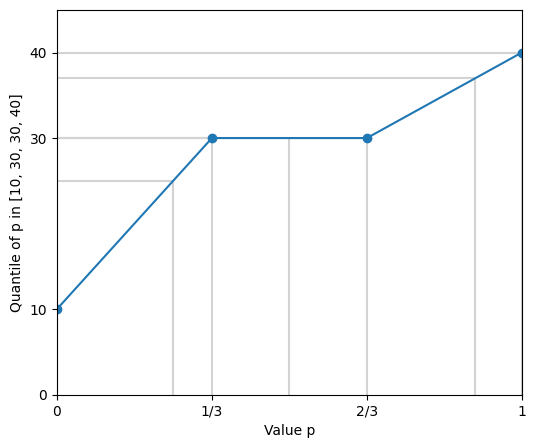

In [9]:
figure, axes = plt.subplots(1, 1, figsize=(6,5))
for p in quantiles:
    q = a.quantile(p)
    axes.plot([p,p,0], [0,q,q], '-', color="lightgrey")
axes.plot([0, 1/3, 2/3, 1], a, 'o-')
axes.set_ylim(0,45)
axes.set_xlim(0,1)
axes.set_xlabel("Value p")
axes.set_ylabel(f"Quantile of p in {list(a)}")
axes.set_xticks([0, 1/3, 2/3, 1], ["0","1/3", "2/3", "1"])
axes.set_yticks([0,10,30,40])
pass

## Measures of variability (miery variability)

Values in the sample may be close to their mean or median, or they can spread widely. It is important to consider how representative is the mean or median of the whole set.

Examples of measures of variability:

* Range of values from **minimum** to **maximum** (sensitive to outliers).
* **Interquartile range IQR (kvartilové rozpätie)**: range between $Q_1$ and $Q_3$ (contains the middle half of the data).
* Variance and standard deviation (we will describe these measures next).


### Variance and standard deviation (rozptyl a smerodajná odchýlka)

To compute **variance**, we take each value in the sample, compute its difference from the mean and square it $(x_i-\bar{x})^2$. The reason for squaring is that we get non-negative values (and squares are easier to work with mathematically than absolute values). Variance is the mean of these squares, but we divide by $n-1$ rather than $n$:

$$s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}$$

We divide by $n-1$ rather than $n$, because we would otherwise underestimate the true variance of the underlying population (more in the statistics course). For large $n$, the difference between dividing by $n$ and $n-1$ is negligible.

The **standard deviation** is the square root of the variance
$$s=\sqrt{s^2}$$
Its advantage is that it is expressed in the same units as the original values. For example, if our values were lengths in meters, variance is in square meters, but standard deviation is again in meters.

**Properties**

* Larger variance and standard deviation mean that data are spread farther from the mean.
* Similarly to the mean, these measures can be strongly influenced by outliers:
  * For 800, 1000, 1100, 1200, 1800, 2000, 30000 st. dev. is 10850.0, IQR 850.
  * For 800, 1000, 1100, 1200, 1800, 2000, 10000 st. dev. is 3310.5,  IQR 850.


### Computation in Pandas

We can use functions [`min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html), [`max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html), [`std`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), [`var`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html), which work similarly to `mean`.

In [10]:
display(Markdown("**Minimum**"), movies['year'].min())
display(Markdown("**Maximum**"), movies['year'].max())
display(Markdown("**Mean**"), movies['year'].mean())
display(Markdown("**Variance**"), movies['year'].var())
display(Markdown("**Standard deviation**"), movies['year'].std())
q1 = movies['year'].quantile(0.25)
q3 = movies['year'].quantile(0.75)
display(Markdown("**Q1, Q3 and interquartile range:**"), q1, q3, q3-q1)


**Minimum**

np.int64(1927)

**Maximum**

np.int64(2017)

**Mean**

np.float64(2004.1449487554905)

**Variance**

np.float64(161.2714600681735)

**Standard deviation**

np.float64(12.699270060447313)

**Q1, Q3 and interquartile range:**

np.float64(2000.0)

np.float64(2013.0)

np.float64(13.0)

## Outliers (odľahlé hodnoty)

**Outliers** are the values which are far from the typical range of values. In data analysis, it is important to **check the outliers**. If they represent errors, we may try to correct or remove them. They can also represent interesting anomalies.

Different definitions of outliers may be appropriate in different situations, there is no definition working for all data sets and purposes. The criterion by statistician John Tukey is often used:

* Outliers are the values outside of the range  $Q_1-k\cdot IQR, Q_3+k\cdot IQR$ for some value of $k$, for example, $k=1.5$.

We will illustrate this definition on our example 800, 1000, 1100, 1200, 1800, 2000, 30000.

* $Q_1=1050$, $Q_3=1900$, $IQR=850$.
* $Q_1-1.5\cdot IQR = -225$, $Q_3+1.5\cdot IQR = 3175$.
* Outliers are values smaller than $-225$ or larger than $3175$; here only $30000$.

Note that in this definintion, the range of outliers is not influenced if we change outliers values (as long as they stay outside of range Q1-Q3).

### Computation in Pandas

The code below finds the outliers in the `year` column.

* We compute the lower and upper thresholds manually from quartiles.
* Then we use `query` to select rows and count how many there are.
* Function [`count`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html) counts the values in a Series or columns of a DataFrame, ignoring missing values.

In [11]:
# get quartiles and IQR
q1 = movies['year'].quantile(0.25)
q3 = movies['year'].quantile(0.75)
iqr = q3 - q1
# compute thresholds for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
# count outliers
count = movies.query('year < @lower or year > @upper')['year'].count()
# print results
display(Markdown(f"**Outliers outside of range:** [{lower}, {upper}]"))
display(Markdown(f"**Outlier count:** {count}"))
display(Markdown(f"**Total count:** {movies['year'].count()}"))

**Outliers outside of range:** [1980.5, 2032.5]

**Outlier count:** 112

**Total count:** 2049

(0.0, 165.0)

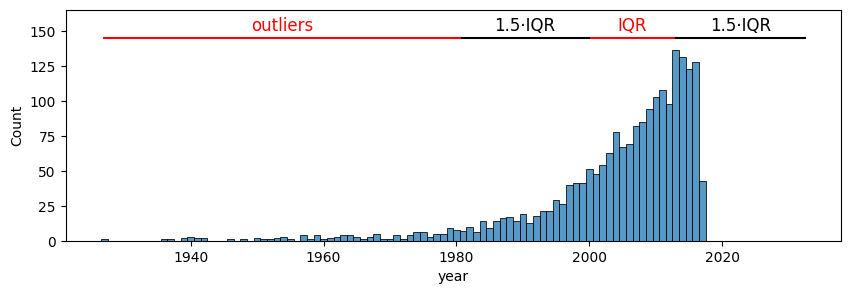

In [12]:
(figure, axes) = plt.subplots(1, 1, figsize=(10,3))
sns.histplot(data=movies, x="year", discrete=True, ax=axes)
axes.plot([q1,q3],[145,145],"-r")
axes.plot([lower,q1],[145,145],"-k")
axes.plot([q3,upper],[145,145],"-k")
axes.plot([movies['year'].min(),lower],[145,145],"-r")
axes.text((q1+q3)/2, 150, "IQR", horizontalalignment='center', color='red', fontsize=12)
axes.text((lower+q1)/2, 150, "1.5·IQR", horizontalalignment='center', color='black', fontsize=12)
axes.text((q3+upper)/2, 150, "1.5·IQR", horizontalalignment='center', color='black', fontsize=12)
axes.text((movies['year'].min()+lower)/2, 150, "outliers", horizontalalignment='center', color='red', fontsize=12)
axes.set_ylim(top=165)
# TODO finish

## Boxplot (krabicový graf)

Boxplots are plots often used in scientific settings. They were developed by [Mary Eleanor Hunt Spear](https://medium.com/nightingale/credit-where-credit-is-due-mary-eleanor-spear-6a7a1951b8e6) and [John Tukey](https://www.nasonline.org/member-directory/deceased-members/49649.html).

For a single numerical variable, boxplot shows the **five-number summary** consisting of the minimum, $Q_1$, median ($Q_2$), $Q_3$ and the maximum.
Median is shown as a thick line, $Q_1$ and $Q_3$ as a box and minimum and maximum as "whiskers".
Outliers are often excluded from the whiskers and shown as individual points.

Summaries of different samples are often compared in a single boxplot with multiple boxes. Boxplots allow clear comparison of basic characteristics.

**Beware:** Bigger box does not mean more data but more variation (in contrast to bar graphs).

### Boxplots in Seaborn

Below is a simple horizontal boxplot of the `year` column drawn using [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function from Seaborn. Recall that in this column, quartiles are 2000, 2008 and 2013, minimum 1927, maximum 2017, outliers outside of [1980.5, 2032.5]. However boxplots of a single variable are rarely used, we could get more information about the column e.g. from a histogram. 

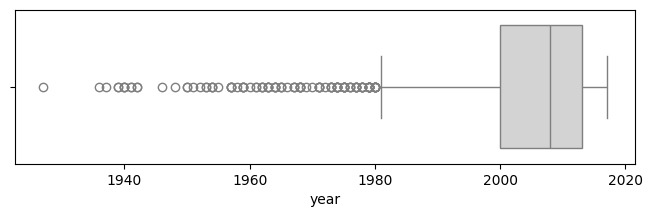

In [13]:
axes = sns.boxplot(data=movies, x='year', color='lightgrey')
axes.figure.set_size_inches(8,2)

Below is a vertical boxplot of the `year` column split into groups according to language. This is achieved by specifying both `x` and `y` options. We can for example see that in our dataset, French movies tend to be more recent than Japanese ones. Italian movies span a longer period.

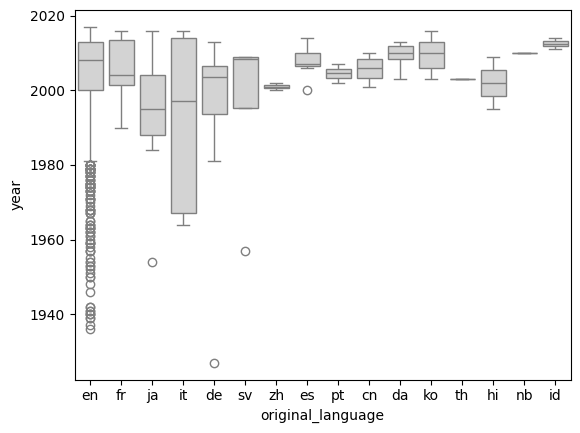

In [14]:
sns.boxplot(data=movies, x='original_language', y='year', color='lightgrey')
pass

However, previous figure can be deceptive because some languages have very few movies and so boxplot does not show any useful information. Below we print the number of movies for each language at the top of the figure. For example, Hindi has a relatively big box, but only two movies, which represent the ends of the whiskers.

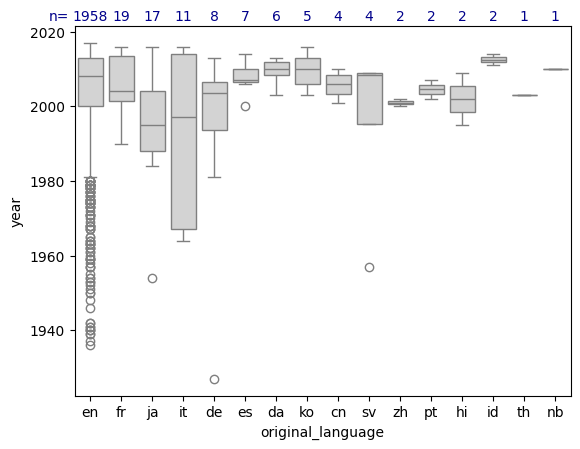

In [15]:
(figure, axes) = plt.subplots(1, 1)
# get the counts of movies in each language
languages = movies['original_language'].value_counts()
# plot the boxplot, specify the order of languages
sns.boxplot(data=movies, x='original_language', y='year', 
            order=languages.index.values, color='lightgrey', ax=axes)
# for each language, display the number of movies
for (i, lang) in enumerate(languages.index.values):
    axes.text(i, 2023, languages[lang], color='darkblue', 
              horizontalalignment='center', fontsize=10)
axes.text(-1, 2023, "n=", color='darkblue', 
          horizontalalignment='center', fontsize=10)
pass

Below we draw a strip plot on top of the boxplot. This allows us to see both individual data points and the summary. Here it does not work very well for `en`, better suited for smaller datasets. Here we again see that some languages have extremely low number of points, boxplots not ideal in that case.

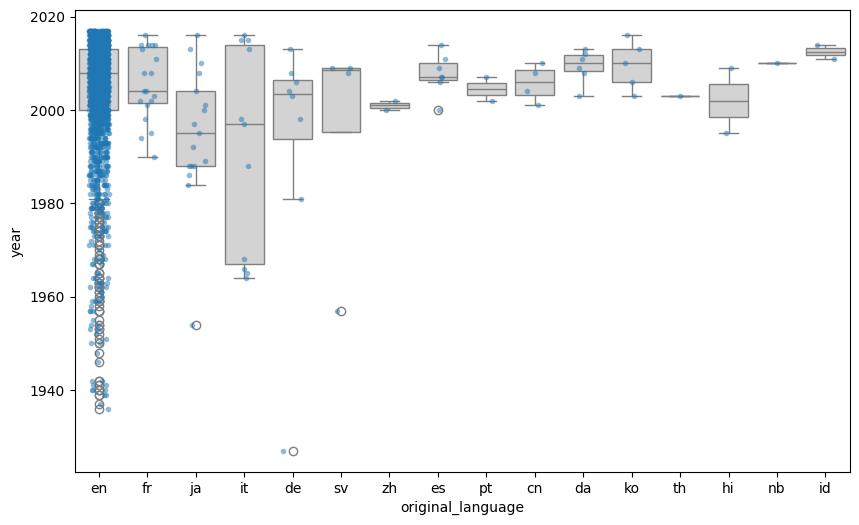

In [16]:
axes = sns.boxplot(data=movies, x='original_language', y='year', color='lightgrey')
sns.stripplot(data=movies, x='original_language', y='year', color='C0', 
              alpha=0.5, size=4, jitter=0.2)
axes.figure.set_size_inches(10,6)
pass

## Quick overview of a data set: `describe` in Pandas

Function [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) gives a quick overview of a data set with many statistics discussed in this lecture.

In [17]:
movies.describe()

,year,budget,revenue,runtime,vote_average,vote_count
count,"2,049.00","1,959.00","1,965.00","2,049.00","2,049.00","2,049.00"
mean,"2,004.14","55,108,939.70","198,565,134.28",112.66,6.63,"1,704.64"
std,12.70,"53,139,663.86","233,028,732.94",24.76,0.77,"1,607.89"
min,"1,927.00",1.00,15.00,7.00,4.00,501.00
25%,"2,000.00","16,000,000.00","52,882,018.00",97.00,6.10,709.00
50%,"2,008.00","38,000,000.00","122,200,000.00",109.00,6.60,"1,092.00"
75%,"2,013.00","75,000,000.00","250,200,000.00",124.00,7.20,"2,000.00"
max,"2,017.00","380,000,000.00","2,787,965,087.00",705.00,9.10,"14,075.00"


By default `describe` only considers numerical columns, but other columns can be included by option `include='all'`.
For categorical columns, Pandas reports different statistics, namely the number of uniqe values `unique`, the most frequent value `top`, and the number of occurrences of this value `freq`. For example, the langauge column has 16 different values, the most frequent being English (`en`) with 1958 movies. 

In [18]:
movies.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,2049,2018,Beauty and the Beast,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,"2,049.00",NaN,NaN,NaN,"2,004.14",12.70,"1,927.00","2,000.00","2,008.00","2,013.00","2,017.00"
budget,"1,959.00",NaN,NaN,NaN,"55,108,939.70","53,139,663.86",1.00,"16,000,000.00","38,000,000.00","75,000,000.00","380,000,000.00"
revenue,"1,965.00",NaN,NaN,NaN,"198,565,134.28","233,028,732.94",15.00,"52,882,018.00","122,200,000.00","250,200,000.00","2,787,965,087.00"
original_language,2049,16,en,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,"2,049.00",NaN,NaN,NaN,112.66,24.76,7.00,97.00,109.00,124.00,705.00
release_date,2049,1740,2014-12-25,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,"2,049.00",NaN,NaN,NaN,6.63,0.77,4.00,6.10,6.60,7.20,9.10
vote_count,"2,049.00",NaN,NaN,NaN,"1,704.64","1,607.89",501.00,709.00,"1,092.00","2,000.00","14,075.00"
overview,2049,2049,"The last Gunslinger, Roland Deschain, has been...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Linear transformation of variables

Consider a numerical variable with values $x_1, \dots, x_n$ and apply linear transformation to change $x_i$ to $ax_i+b$ where $a$ and $b$ are some constant values. We often do such transformations, e.g. when expressing the values in different units. For example, to convert grams to kilograms, we multiply by $a=0.001$ ($b=0$). To convert from degrees Celsius to degrees Fahrenheit, we apply both $a=9/5$ and $b=32$.

What happens to various summary statistics after such transformation? 

* Mean, medain and mode are transformed in the same way. For example, the new mean will be $a\bar{x}+b$. That is, the statistics for the transformed variable will correspond to the same value in the new units of measurement.
* Variance is multiplied by $a^2$, standard deviation by $|a|$. These two measurs are not influenced by the value of $b$.

Try to argue that these are correct from the formulas for the mean, variance, and standard deviation, which we repeat here:

$$\bar{x}=\frac{\sum_{i=1}^n x_i}{n}$$

$$s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}$$

$$s=\sqrt{s^2}$$

For example, to compute the mean of the transformed variables, we get
$$\frac{(ax_1+b)+(ax_2+b)+\cdots+(ax_n+b)}{n} = \frac{a(x_1+\dots+x_n)+nb}{n} = a\bar{x}+b.$$

## Correlation (korelácia)

We are often interested in relationships among different variables (data columns). We will now discuss two correlation coefficients that measure the strength of such relationships.

Remember one the basic rules of data science: **correlation does not imply causation**.

* If electricity consumption grows in a very cold weather, there might be **cause-and-effect** relationship: the cold weather is causing people to use more electricity for heating.
* If healthier people tend to be happier, which is the cause and which is effect?
* Both studied variables can be also influenced by some third, **unknown factor**. For example, within a year, deaths by drowning increase with increased ice cream consumption. Both increases are spurred by warm weather.
* The observed correlation can be just a **coincidence**, see the [Redskins rule](https://en.wikipedia.org/wiki/Redskins_Rule) and a specialized webpage [Spurious Correlations](http://www.tylervigen.com/spurious-correlations). You can easily find such "coincidences" by comparing many pairs of variables (a practice called data dredging).

### Pearson correlation coefficient

Consider pairs of values $(x_1,y_1),\dots, (x_n,y_n)$, where $(x_i,y_i)$ are two different features of the same object. **Pearson correlation coefficient** measures **linear** relationship between two variables.
$$r = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n (y_i-\bar{y})^2}}$$

It can be equivalently defined as follows ($s_x$ denotes the standard deviation of variable $x$):
$$r = \frac{1}{n-1}\sum_{i=1}^n \left(\frac{x_i-\bar{x}}{s_x}\right)\left(\frac{y_i-\bar{y}}{s_y}\right).$$

Expression $(x_i-\bar{x})/s_x$ is called the **standard score** or **z-score**, and it tells us how many standard deviations above or below the mean value $x_i$ is. The product of $(x_i-\bar{x})/s_x$ and $(y_i-\bar{y})/s_y$ is positive if $x_i$ and $y_i$ lie on the same side of the respective means of $x$ and $y. It is negative if they lie on the opposite sides.



### Properties of Pearson correlation coefficient

* It is symmetric $r_{x,y} = r_{y,x}$.
* It does not change if we apply linear transformation $ax_i+b$, $cy_i+d$ to the variables, as long as $a,c > 0$. What happens for $a<0$?
* The value of $r$ is always from interval $[-1,1]$.
* It is 1 if $y$ grows linearly with $x$, -1 if $y$ decreases linearly with increasing $x$. 
* Zero means no correlation.
* Values between 0 and 1 mean intermediate value of positive correlation, values between -1 and 0 negative correlation.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/640px-Correlation_coefficient.png">

<small>https://commons.wikimedia.org/wiki/File:Correlation_coefficient.png Kiatdd, CC BY-SA 3.0</small>

**Some cautions**

* Pearson correlation measures only linear relationships (x and y in the bottom row of the image have non-linear relationships but their correlation is 0).
* Pearson correlation does not depend on the slope of the best-fit line (see the middle row in the image below).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/640px-Correlation_examples2.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg public domain</small>


### Linear regression

The process of finding the line best representing the relationship of $x$ and $y$ is called **linear regression**.
Regression can also be used in higher dimensions to predict one variable as a linear combination of many others. You will study linear regression in later courses, but we may draw regression lines in some plots. Seaborn's `regplot` does it automatically.

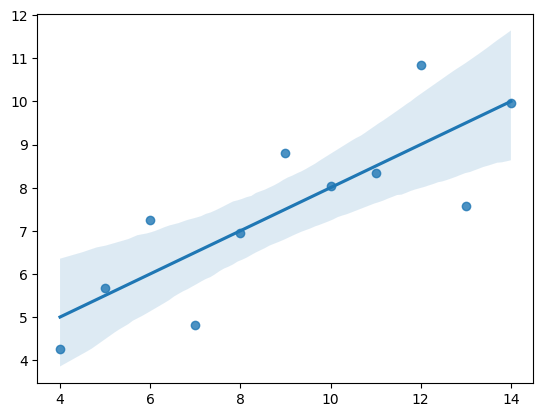

In [19]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
sns.regplot(x=x, y=y1)
pass

### Spearman's rank correlation coefficient

Spearman's rank correlation coefficient can detect non-linear relationships between to variables. To compute it, we first convert each variable into ranks:

* The **rank** of $x_i$ is its index in the sorted order of $x_1,\dots,  x_n$.
* Equal values get the same (average) rank.
* For example, the ranks of 10, 0, 10, 20, 10, 20 are 3, 1, 3, 5.5, 3, 5.5.

Then we compute Pearson correlation coefficient of the two rank sequences.

* Spearman's coeffcient has value of 1, -1 if $y$ monotonically increases or decreases with $x$.
* It is less sensitive to distant outliers (the actual values of $x$ and $y$ are not important).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/360px-Spearman_fig1.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg Skbkekas, CC BY-SA 3.0 </small>


### Computation in Pandas

Function [`corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) computes correlation between all pairs of numerical columns. There is also a [version](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) to compare two Series. In our table, the highest Pearson correlation is 0.69 for pairs (`budget`, `revenue`), (`vote_count`, `revenue`).

In [20]:
movies.corr(numeric_only=True)

,year,budget,revenue,runtime,vote_average,vote_count
year,1.00,0.28,0.12,-0.07,-0.34,0.12
budget,0.28,1.00,0.69,0.22,-0.18,0.47
revenue,0.12,0.69,1.00,0.25,0.06,0.69
runtime,-0.07,0.22,0.25,1.00,0.31,0.25
vote_average,-0.34,-0.18,0.06,0.31,1.00,0.33
vote_count,0.12,0.47,0.69,0.25,0.33,1.00


With Spearman rank correlation, the correlation between `revenue` and `budget` remains similar, but correlation between `vote_count` and `budget` decreases from 0.69 to 0.56.

In [21]:
movies.corr(method='spearman', numeric_only=True)

,year,budget,revenue,runtime,vote_average,vote_count
year,1.00,0.21,0.02,-0.03,-0.27,0.14
budget,0.21,1.00,0.68,0.24,-0.28,0.37
revenue,0.02,0.68,1.00,0.21,-0.08,0.56
runtime,-0.03,0.24,0.21,1.00,0.32,0.27
vote_average,-0.27,-0.28,-0.08,0.32,1.00,0.29
vote_count,0.14,0.37,0.56,0.27,0.29,1.00


Below we draw show the regression line for `revenue` versus `vote_count`. We use Seaborn [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to draw scatterplot together with the regression line. Points are made smaller and transparent by `scatter_kws={'alpha':0.7, 's':5}`. The plot on the right shows ranks instead of actual values. Ranks are computed using [rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) function for Series.

Visually there is little correlation in the rank plot, which agrees with lower Spearman correlation. Hoiher Pearson correlation coefficient is probably driven by outliers, movies with very high revenue and vote count. However most of the points are in the densely populated lower left corner of the left plot.

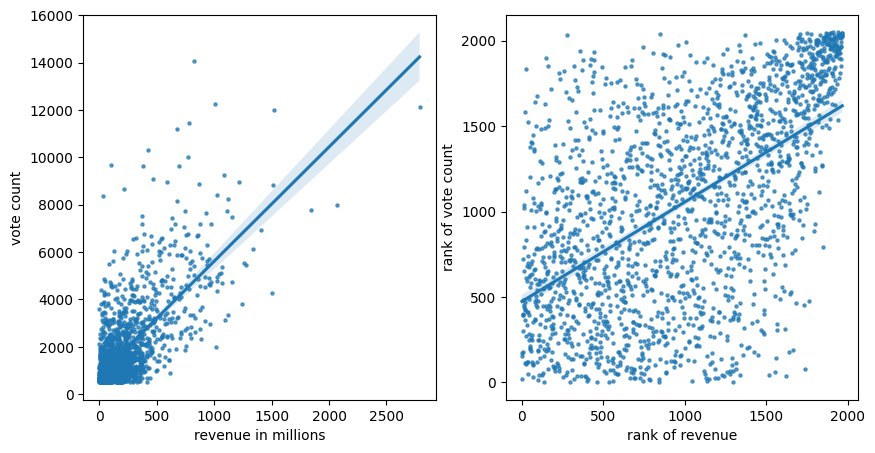

In [22]:
# figure with two plots
figure, axes = plt.subplots(1, 2, figsize=(10,5))
# plot of values
sns.regplot(x=movies['revenue'] / 1e6, y=movies['vote_count'], 
            ax=axes[0], scatter_kws={'alpha':0.7, 's':5})
axes[0].set_xlabel('revenue in millions')
axes[0].set_ylabel('vote count')
# compute ranks
revenue_rank = movies['revenue'].rank()
vote_count_rank = movies['vote_count'].rank()
# plot of ranks
sns.regplot(x=revenue_rank, y=vote_count_rank, 
            ax=axes[1], scatter_kws={'alpha':0.7, 's':5})
axes[1].set_xlabel('rank of revenue')
axes[1].set_ylabel('rank of vote count')
pass

## Anscombe's quartet and the importance of visualization

**Anscombe's quartet** are four artificial [data sets](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html) designed by [Francis Anscombe](https://doi.org/10.1080%2F00031305.1973.10478966). All have the same or very similar values of means and variances of both $x$ and $y$, Pearson correlation coefficient (0.816) and linear regression line. But visually we see each has a very different character. The bottom row illustrates the influence of outliers on correlation and regression. Overall this shows that plots give us a much better idea of the properties of a data set than simple numerical summaries.

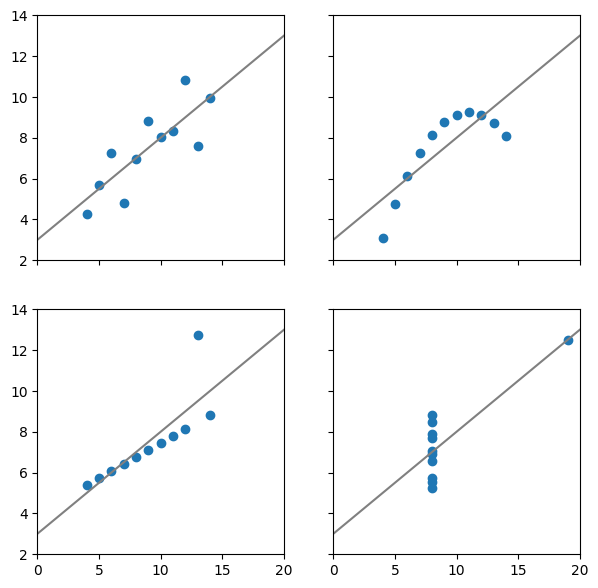

In [23]:
# adapted from https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
datasets = [(x, y1), (x, y2), (x, y3), (x4, y4)]

figure, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(7, 7))
axes[0, 0].set(xlim=(0, 20), ylim=(2, 14))

for ax, (x, y) in zip(axes.flat, datasets):
    ax.plot(x, y, 'o')
    # linear regression
    slope, intercept = np.polyfit(x, y, deg=1) 
    ax.axline(xy1=(0, intercept), slope=slope, color='gray')

### Visual overview of a data set: `pairplot` in Seaborn

Seaborn [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) generates a matrix of plots for all numerical columns of a dataframe. The diagonal contains histograms of individual columns. Off-diagonal entries are scatterplots of two columns. Below only 3 columns shown for simpler examination.

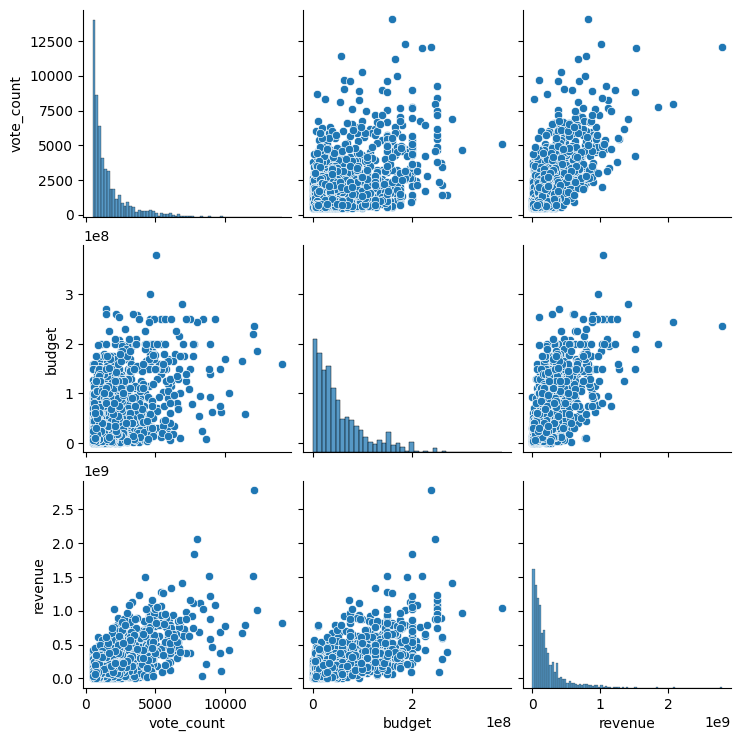

In [24]:
subset = movies.loc[:, ['vote_count', 'budget', 'revenue']]
grid = sns.pairplot(subset, height=2.5)
pass

## Computing summaries of subsets of data: `groupby` from Pandas

We have seen that Seaborn can create plots where the data are split into groups according to a categorical variable. One example are boxplots, which we have seen today. How can we compute summary statistics for each such group in Pandas?


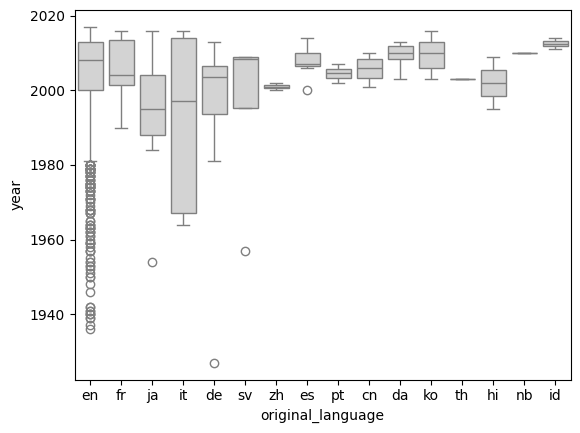

In [25]:
sns.boxplot(data=movies, x='original_language', y='year', color='lightgrey')
pass

Pandas DataFrame has function `groupby` which splits the table into groups based on values of some column. We can apply a summary statistics function on each group. Below we compute medians of all numerical columns for each language and show the first 5 languages.

In [26]:
movies.groupby('original_language').median(numeric_only=True).head()

,year,budget,revenue,runtime,vote_average,vote_count
original_language,,,,,,
cn,"2,006.00","12,902,809.00","39,388,380.00",108.50,7.20,762.50
da,"2,010.00","10,000,000.00","16,740,418.00",119.00,6.80,867.50
de,"2,003.50","6,250,000.00","70,000,000.00",129.00,7.60,669.00
en,"2,008.00","40,000,000.00","126,397,819.00",109.00,6.60,"1,126.00"
es,"2,007.00","2,000,000.00","30,448,000.00",118.00,7.60,797.00


We can also apply `describe` on the `groupby` groups. Below only two numerical columns of the original table are shown.

In [27]:
subset = movies.loc[:, ['original_language', 'year', 'budget']]
subset.groupby('original_language').describe().head()

year                                                     \
                     count     mean   std      min      25%      50%      75%   
original_language                                                               
cn                    4.00 2,005.75  4.03 2,001.00 2,003.25 2,006.00 2,008.50   
da                    6.00 2,009.33  3.61 2,003.00 2,008.25 2,010.00 2,011.75   
de                    8.00 1,992.50 28.13 1,927.00 1,993.75 2,003.50 2,006.50   
en                1,958.00 2,004.30 12.54 1,936.00 2,000.00 2,008.00 2,013.00   
es                    7.00 2,007.71  4.39 2,000.00 2,006.50 2,007.00 2,010.00   

                             budget                                            \
                       max    count          mean           std           min   
original_language                                                               
cn                2,010.00     3.00 14,872,795.67  4,479,793.25 11,715,578.00   
da                2,013.00     5.00 13,440,000.00 12,369,640.25  3,800,000.00   
de                2,013.00     8.00 18,223,718.75 30,623,544.47  1,530,000.00   
en                2,017.00 1,891.00 56,637,200.97 53,394,829.52          1.00   
es                2,014.00     5.00  7,500,000.00  8,046,738.47  1,500,000.00   

                                                                            
                            25%           50%           75%            max  
original_language                                                           
cn                12,309,193.50 12,902,809.00 16,451,404.50  20,000,000.00  
da                 7,400,000.00 10,000,000.00 11,000,000.00  35,000,000.00  
de                 4,100,000.00  6,250,000.00 15,084,937.50  92,620,000.00  
en                18,000,000.00 40,000,000.00 80,000,000.00 380,000,000.00  
es                 2,000,000.00  2,000,000.00 13,000,000.00  19,000,000.00

## Summary

In this lecture, we have seen several summary statistics:

* mean, median, mode
* percentiles, quantiles, quartiles
* min, max, interquartile range, variance, standard deviation
* Pearson and Spearman correlation

You will learn more about these statistics and their properties in more details in a statistics course.

We have also seen three new types of plots:

* boxplot
* scatter plots with regression lines 
* pairplot

We have also seen some new commands from Pandas:

* functions for computing statistics, `describe`
* `groupby`

The next lecture will cover more Pandas concepts and functions. 